In [7]:
from Runner import CycleGanRunner
import DataContainer
import PostProcessor
import tensorflow as tf

In [8]:
def upscale_generated_image(input_image):
    rescaled_image = (input_image + 1) * 127.5
    return rescaled_image.numpy()[0].astype('uint8')



In [11]:

import os 
#File paths
base_folder=os.path.abspath('../../')
raw_data_folder= os.path.join(base_folder, 'data', 'raw', 'monet2photo')
processed_data_folder=os.path.join(base_folder, 'data', 'processed', 'monet2photo')
records_path=os.path.join(os.path.join(processed_data_folder, 'testA'))
records_path2=os.path.join(os.path.join(processed_data_folder, 'testB'))

#Feature map
feature_description = {'text_feature': tf.io.FixedLenFeature([], dtype=tf.string),}

#Data figures
domainA_contianer = DataContainer.TensorflowDataObject(records_path, feature_description, 'text_feature')
domainB_container = DataContainer.TensorflowDataObject(records_path2, feature_description, 'text_feature')

file_object = {'traina' : domainA_contianer, 'trainb' : domainB_container}
processor = PostProcessor.ImagePostProcess()

A=CycleGanRunner(file_object, processor)

A.run_batch()


{0: [[16.419956, 16.055132, 0.740445, 0.7514317], [11.49675, 12.502874, 0.7506455, 0.7475697], [13.521955, 12.879776, 0.7380729, 0.7561148], [11.993591, 11.656057, 0.73971725, 0.75030994], [11.905109, 12.11323, 0.7422574, 0.74926984], [9.23431, 9.567967, 0.74401486, 0.750736], [7.779519, 7.226047, 0.746371, 0.74675155], [13.397234, 11.684758, 0.74035263, 0.7494719], [7.3770165, 7.273199, 0.74020314, 0.74869585], [7.7642136, 7.408638, 0.73972476, 0.75295734], [9.898229, 9.389368, 0.7433692, 0.7512659], [7.4838023, 7.7616777, 0.7424296, 0.7455518], [6.7875395, 6.5746403, 0.74679124, 0.74435973], [6.8058777, 6.1091175, 0.7515071, 0.7357452], [9.316831, 8.212619, 0.7470747, 0.73958457], [6.6300855, 6.452082, 0.75366366, 0.7343333], [10.124839, 10.161308, 0.74624693, 0.74370134], [6.6226234, 6.546257, 0.7488621, 0.73721117], [7.4799366, 8.288107, 0.74472225, 0.74075735], [10.936914, 9.286011, 0.73692846, 0.7574707], [8.589367, 8.749145, 0.7456523, 0.7395693], [12.109629, 9.989844, 0.7479358

In [61]:
print(A.batch_number)
A.run_batch()
print(A.batch_number)

4


StopIteration: 

In [63]:
A.error_tracking

{0: [[16.419956, 16.055132, 0.740445, 0.7514317],
  [11.49675, 12.502874, 0.7506455, 0.7475697],
  [13.521955, 12.879776, 0.7380729, 0.7561148],
  [11.993591, 11.656057, 0.73971725, 0.75030994],
  [11.905109, 12.11323, 0.7422574, 0.74926984],
  [9.23431, 9.567967, 0.74401486, 0.750736],
  [7.779519, 7.226047, 0.746371, 0.74675155],
  [13.397234, 11.684758, 0.74035263, 0.7494719],
  [7.3770165, 7.273199, 0.74020314, 0.74869585],
  [7.7642136, 7.408638, 0.73972476, 0.75295734],
  [9.898229, 9.389368, 0.7433692, 0.7512659],
  [7.4838023, 7.7616777, 0.7424296, 0.7455518],
  [6.7875395, 6.5746403, 0.74679124, 0.74435973],
  [6.8058777, 6.1091175, 0.7515071, 0.7357452],
  [9.316831, 8.212619, 0.7470747, 0.73958457],
  [6.6300855, 6.452082, 0.75366366, 0.7343333],
  [10.124839, 10.161308, 0.74624693, 0.74370134],
  [6.6226234, 6.546257, 0.7488621, 0.73721117],
  [7.4799366, 8.288107, 0.74472225, 0.74075735],
  [10.936914, 9.286011, 0.73692846, 0.7574707],
  [8.589367, 8.749145, 0.7456523, 0.7

In [54]:
M1=[]
M2=[]
M3=[]
M4=[]

In [55]:
for batch in A.error_tracking:
    for instance in A.error_tracking[batch]:
        M1.append(instance[0])
        M2.append(instance[1])
        M3.append(instance[2])
        M4.append(instance[3])

In [56]:
import matplotlib.pyplot as plt

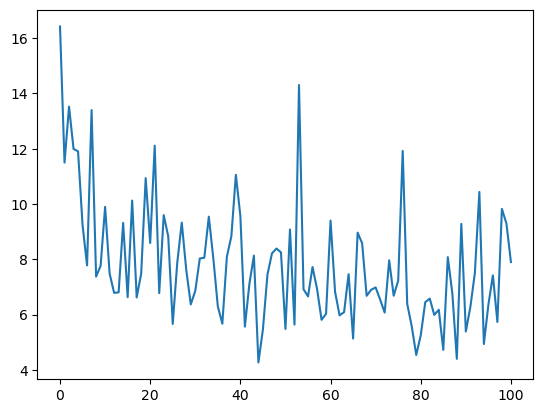

In [57]:
plt.plot(M1)

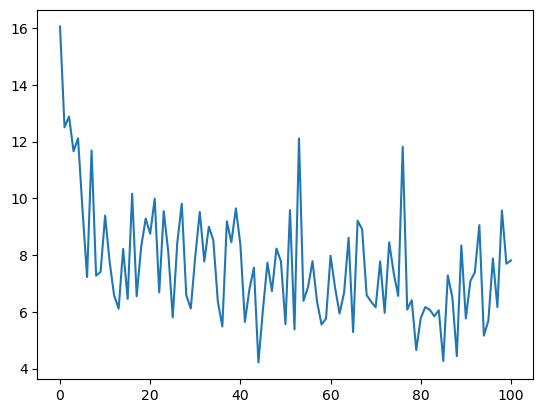

In [58]:
plt.plot(M2)

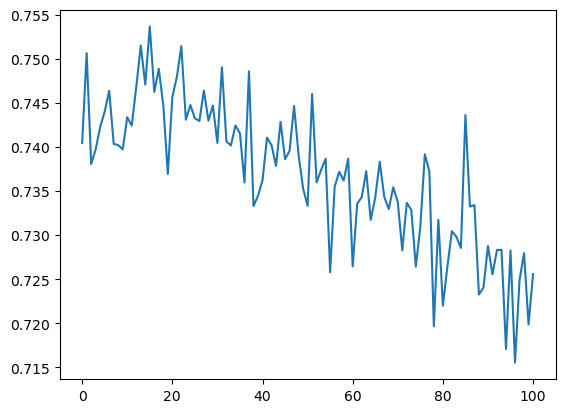

In [59]:
plt.plot(M3)

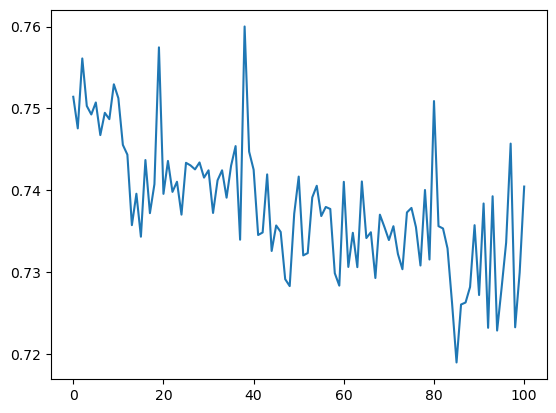

In [60]:
plt.plot(M4)

In [72]:
import pandas as pd

In [76]:
import json

In [81]:
def save_model(input_runner, model_name, epoch):
    
    
    model_folder = os.path.join(base_folder, 'src', 'models', 'created', model_name, str(epoch))
    b_folder = os.path.join(base_folder, 'src', 'models', 'created', model_name)

    Thing = json.dumps(A.error_tracking)

    print(Thing)


    #A.a_b_generator.save(model_folder)
    #error_output=pd.DataFrame(A.error_tracking)
    #print(error_output)
    #return model_folder

save_model(A, 'GAN_V1', 1)



TypeError: Object of type float32 is not JSON serializable

In [ ]:

import os 
#File paths
base_folder=os.path.abspath('../../')
raw_data_folder= os.path.join(base_folder, 'data', 'raw', 'monet2photo')
processed_data_folder=os.path.join(base_folder, 'data', 'processed', 'monet2photo')
records_path=os.path.join(os.path.join(processed_data_folder, 'testA'))
records_path2=os.path.join(os.path.join(processed_data_folder, 'testB'))

#Feature map
feature_description = {'text_feature': tf.io.FixedLenFeature([], dtype=tf.string),}

#Data figures
domainA_contianer = DataContainer.TensorflowDataObject(records_path, feature_description, 'text_feature')
domainB_container = DataContainer.TensorflowDataObject(records_path2, feature_description, 'text_feature')

file_object = {'traina' : domainA_contianer, 'trainb' : domainB_container}
processor = PostProcessor.ImagePostProcess()

A=CycleGanRunner(file_object, processor)

A.run_batch()
